**PILAR ARIAS VAZQUEZ, ÁLVARO GARCÍA CID, YEDRA MARTÍN OLMOS, AMAYA SARASA COLINA**

**<GRUPO 7>**

# IMPORTAMOS LIBRERÍAS Y DATOS

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
assert train_images.shape == (60000,28,28)
assert test_images.shape == (10000,28,28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


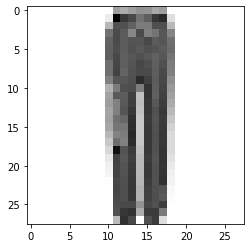

In [ ]:
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255
train_labels = train_labels.reshape((60000,1))
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255
test_labels = test_labels.reshape((10000,1))

In [ ]:
print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28, 1)
(60000, 1)


# CASOS

## CASO 1.1

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
model.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 13s 4ms/step - loss: 1.0040 - accuracy: 0.6504 - val_loss: 0.6403 - val_accuracy: 0.7703
Epoch 2/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5956 - accuracy: 0.7821 - val_loss: 0.5360 - val_accuracy: 0.8067
Epoch 3/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5185 - accuracy: 0.8138 - val_loss: 0.5142 - val_accuracy: 0.8121
Epoch 4/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4737 - accuracy: 0.8325 - val_loss: 0.4729 - val_accuracy: 0.8283
Epoch 5/5
960/960 [==============================] - 4s 4ms/step - loss: 0.4432 - accuracy: 0.8431 - val_loss: 0.4444 - val_accuracy: 0.8419


Test loss: 0.4323307275772095 / Test accuracy: 0.847599983215332


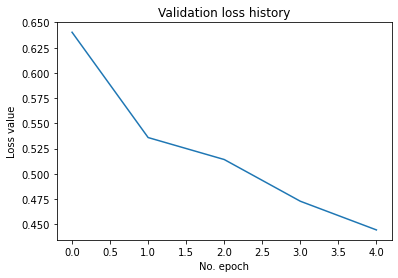

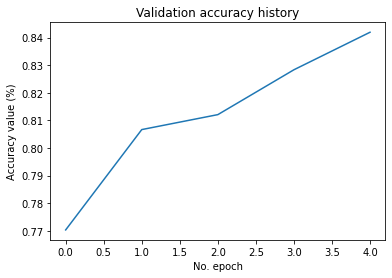

In [ ]:
# Generamos las métricas de generalización
score = model.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 1.2

In [ ]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))
model12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
model12.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history12=model12.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 4s 4ms/step - loss: 1.0532 - accuracy: 0.6319 - val_loss: 0.6403 - val_accuracy: 0.7635
Epoch 2/25
960/960 [==============================] - 3s 4ms/step - loss: 0.5988 - accuracy: 0.7789 - val_loss: 0.5603 - val_accuracy: 0.7956
Epoch 3/25
960/960 [==============================] - 3s 3ms/step - loss: 0.5213 - accuracy: 0.8130 - val_loss: 0.5088 - val_accuracy: 0.8160
Epoch 4/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4770 - accuracy: 0.8296 - val_loss: 0.4638 - val_accuracy: 0.8365
Epoch 5/25
960/960 [==============================] - 3s 4ms/step - loss: 0.4471 - accuracy: 0.8416 - val_loss: 0.4685 - val_accuracy: 0.8324
Epoch 6/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4273 - accuracy: 0.8488 - val_loss: 0.4267 - val_accuracy: 0.8448
Epoch 7/25
960/960 [==============================] - 3s 4ms/step - loss: 0.4102 - accuracy: 0.8535 - val_loss: 0.4132 - val_accuracy: 0.8538
Epoch 

Test loss: 0.29281550645828247 / Test accuracy: 0.8971499800682068


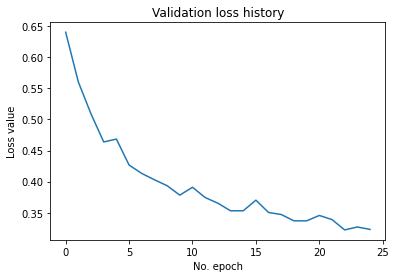

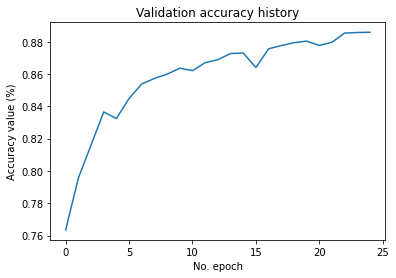

In [ ]:
# Generamos las métricas de generalización
score = model12.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history12.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history12.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

A medida que van avanzando las épocas, se puede observar cómo va 

## CASO 1.3

In [ ]:
model13 = Sequential()
model13.add(Conv2D(32, (5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))
model13.add(MaxPooling2D((2, 2)))

model13.add(Conv2D(64, (5, 5), strides=(1, 1), activation='tanh'))
model13.add(MaxPooling2D((2, 2)))

model13.add(Flatten())
model13.add(Dense(10, activation='softmax'))
model13.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
model13.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history13=model13.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.9439 - accuracy: 0.6883 - val_loss: 0.6369 - val_accuracy: 0.7667
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.5887 - accuracy: 0.7865 - val_loss: 0.5438 - val_accuracy: 0.8002
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5164 - accuracy: 0.8163 - val_loss: 0.4906 - val_accuracy: 0.8197
Epoch 4/5
960/960 [==============================] - 3s 4ms/step - loss: 0.4727 - accuracy: 0.8320 - val_loss: 0.4573 - val_accuracy: 0.8366
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4412 - accuracy: 0.8447 - val_loss: 0.4357 - val_accuracy: 0.8440


Test loss: 0.4292723834514618 / Test accuracy: 0.8489833474159241


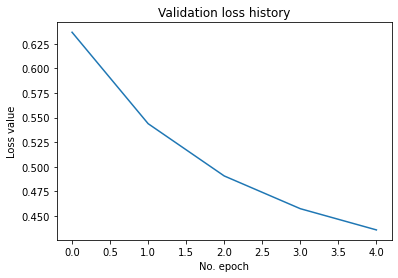

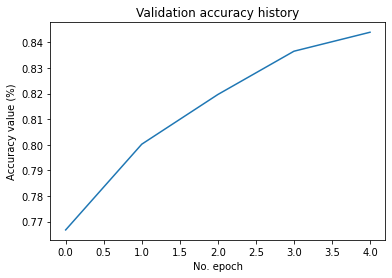

In [ ]:
# Generamos las métricas de generalización
score = model13.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history13.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history13.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

Comparando con el caso 1.1, es decir, con la función de activación ReLU, se puede apreciar que en la primera época, se alcanza más precisión y menos pérdida, con la función de activación tanh (caso 1.3). ReLU tiende a tener más función de pérdida a lo largo de las 5 épocas, sin embargo, a partir de la primera época, se aprecia más precisión. 
Por lo que al final de las 5 épocas, encontramos menos pérdida en tanh, pero más precisión en ReLU.
Efectivamente, esto se puede comprobar gracias a las gráficas que se han realizado anteriormente en cada caso. 
Dependiendo de para qué estemos usando el modelo se utilizará una función de pérdida u otra. Por ejemplo, si estuviésemos tratando con vidas, lo que buscamos es ... 



## CASO 2.1

In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(65,activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

In [ ]:
model2.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 5s 5ms/step - loss: 0.9397 - accuracy: 0.6713 - val_loss: 0.6169 - val_accuracy: 0.7773
Epoch 2/5
960/960 [==============================] - 4s 5ms/step - loss: 0.5900 - accuracy: 0.7832 - val_loss: 0.5586 - val_accuracy: 0.7997
Epoch 3/5
960/960 [==============================] - 4s 5ms/step - loss: 0.5094 - accuracy: 0.8153 - val_loss: 0.4812 - val_accuracy: 0.8274
Epoch 4/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4600 - accuracy: 0.8344 - val_loss: 0.4648 - val_accuracy: 0.8312
Epoch 5/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4271 - accuracy: 0.8477 - val_loss: 0.4274 - val_accuracy: 0.8510


Test loss: 0.41321244835853577 / Test accuracy: 0.8551333546638489


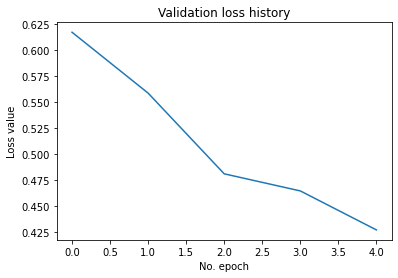

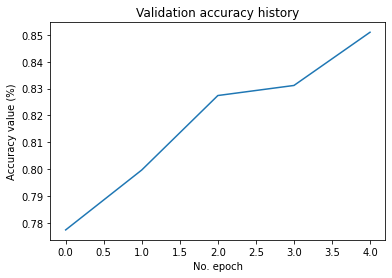

In [ ]:
# Generamos las métricas de generalización
score = model2.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 2.2

In [ ]:
model22 = Sequential()
model22.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28, 28, 1)))
model22.add(MaxPooling2D((2, 2)))

model22.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model22.add(MaxPooling2D((2, 2)))

model22.add(Flatten())
model22.add(Dense(65,activation='relu'))
model22.add(Dense(10, activation='softmax'))
model22.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 65)               

In [ ]:
model22.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history22=model22.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 5s 5ms/step - loss: 0.9121 - accuracy: 0.6816 - val_loss: 0.6660 - val_accuracy: 0.7484
Epoch 2/25
960/960 [==============================] - 5s 5ms/step - loss: 0.5674 - accuracy: 0.7935 - val_loss: 0.5153 - val_accuracy: 0.8111
Epoch 3/25
960/960 [==============================] - 4s 5ms/step - loss: 0.4853 - accuracy: 0.8250 - val_loss: 0.4547 - val_accuracy: 0.8357
Epoch 4/25
960/960 [==============================] - 4s 5ms/step - loss: 0.4399 - accuracy: 0.8418 - val_loss: 0.4422 - val_accuracy: 0.8443
Epoch 5/25
960/960 [==============================] - 5s 5ms/step - loss: 0.4107 - accuracy: 0.8533 - val_loss: 0.4082 - val_accuracy: 0.8555
Epoch 6/25
960/960 [==============================] - 5s 5ms/step - loss: 0.3902 - accuracy: 0.8597 - val_loss: 0.3968 - val_accuracy: 0.8575
Epoch 7/25
960/960 [==============================] - 5s 5ms/step - loss: 0.3743 - accuracy: 0.8667 - val_loss: 0.3679 - val_accuracy: 0.8705
Epoch 

Test loss: 0.24917878210544586 / Test accuracy: 0.9085166454315186


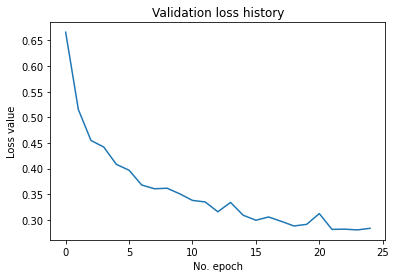

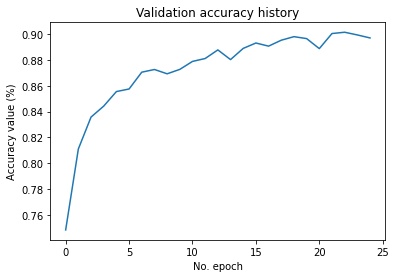

In [ ]:
# Generamos las métricas de generalización
score = model22.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history22.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history22.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 3.1

In [ ]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28,28,1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(65,activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 65)               

In [ ]:
model3.compile(loss=sparse_categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history3=model3.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4627 - accuracy: 0.8336 - val_loss: 0.3333 - val_accuracy: 0.8805
Epoch 2/5
960/960 [==============================] - 5s 5ms/step - loss: 0.2973 - accuracy: 0.8933 - val_loss: 0.2944 - val_accuracy: 0.8945
Epoch 3/5
960/960 [==============================] - 5s 5ms/step - loss: 0.2522 - accuracy: 0.9076 - val_loss: 0.2724 - val_accuracy: 0.9002
Epoch 4/5
960/960 [==============================] - 5s 5ms/step - loss: 0.2221 - accuracy: 0.9172 - val_loss: 0.2536 - val_accuracy: 0.9072
Epoch 5/5
960/960 [==============================] - 5s 5ms/step - loss: 0.1954 - accuracy: 0.9285 - val_loss: 0.2426 - val_accuracy: 0.9135


Test loss: 0.17796774208545685 / Test accuracy: 0.9363166689872742


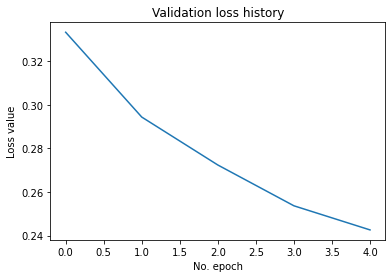

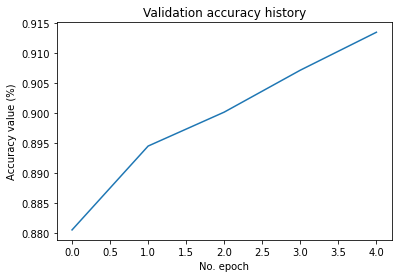

In [ ]:
# Generamos las métricas de generalización
score = model3.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 3.2

In [ ]:
model32 = Sequential()
model32.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28,28,1)))
model32.add(MaxPooling2D((2, 2)))

model32.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model32.add(MaxPooling2D((2, 2)))

model32.add(Flatten())
model32.add(Dense(65,activation='relu'))
model32.add(Dense(10, activation='softmax'))
model32.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 65)               

In [ ]:
model32.compile(loss=sparse_categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history32=model32.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 5s 5ms/step - loss: 0.4569 - accuracy: 0.8328 - val_loss: 0.3823 - val_accuracy: 0.8642
Epoch 2/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2983 - accuracy: 0.8922 - val_loss: 0.3051 - val_accuracy: 0.8874
Epoch 3/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2545 - accuracy: 0.9061 - val_loss: 0.2560 - val_accuracy: 0.9052
Epoch 4/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2231 - accuracy: 0.9173 - val_loss: 0.2441 - val_accuracy: 0.9122
Epoch 5/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2007 - accuracy: 0.9256 - val_loss: 0.2523 - val_accuracy: 0.9104
Epoch 6/25
960/960 [==============================] - 5s 5ms/step - loss: 0.1770 - accuracy: 0.9340 - val_loss: 0.2522 - val_accuracy: 0.9072
Epoch 7/25
960/960 [==============================] - 5s 5ms/step - loss: 0.1561 - accuracy: 0.9424 - val_loss: 0.2482 - val_accuracy: 0.9156
Epoch 

Test loss: 0.13235265016555786 / Test accuracy: 0.9768000245094299


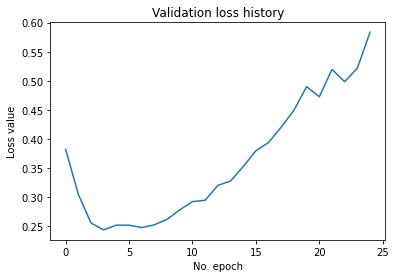

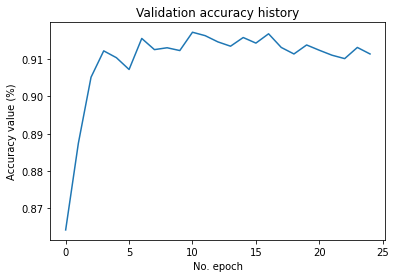

In [ ]:
# Generamos las métricas de generalización
score = model32.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history32.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history32.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# ANÁLISIS MODEL.SUMMARY()


Se analizarán los 3 casos teniendo en cuenta que el stride que se utiliza es 1.

  ## CASO 1
  **1ª capa convolucional:**

  - Conv2d:

      (5x5 de matriz W + 1 del bias) x 32 filtros = *832 parámetros*

  - MaxPooling2D:

      0, no se hace uso de parámetros.

  **2ª capa convolucional**

  - Conv2D_1:

      (5x5 de matriz W x 32 filtros anteriores + 1 del bias) x 64 filtros = *51 264 parámetros*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.
  - Dense

      El número de parámteros de la capa soft-max es 10 x 1024 + 10 = *10250 parámetros*

**Parámetros totales**

  *832* de la 1ª capa convolucional + *51264* de la 2ª capa convolucional + *10250* de la capa dense = *62,346* parámetros entrenables. 


  ## CASO 2

  **1ª capa convolucional:**

  - Conv2d: 
    
      (7x7 de matriz W + 1 del bias) x 64 filtros = *3200 parámetros*

  - MaxPooling2D: 

      0, no se hace uso de parámetros.

  **2ª capa convolucional**

  - Conv2d: 

      (3x3 de matriz W x 64 filtros anteriores + 1 del bias) x 128 filtros = *73 856 parámetros.*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.

  - Dense_1

      El número de parámetros de la capa ReLU es 64 x 32 x 65 del filtro + 65 del bias = *133 185 parámetros.**

  - Dense_2

      El número de parámetros de la capa soft-max es 10 x 65 + 10 = *660 parámetros.*



  **Parámetros totales**

  *3200* de la 1ª capa convolucional + *73856* de la 2ª capa convolucional + *133 185* de la 1ª capa dense + 660 de la 2ª capa dense = *210 901 parámetros.*


  ## CASO 3

  **1ª capa convolucional:**

  - Conv2d: 
    
      (7x7 de matriz W + 1 del bias) x 64 filtros = *3200 parámetros*

  - MaxPooling2D: 

      0, no se hace uso de parámetros.

**2ª capa convolucional**

  - Conv2d: 

      (3x3 de matriz W x 64 filtros anteriores + 1 del bias) x 128 filtros = *73 856 parámetros.*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.

  - Dense_1

      El número de parámetros de la capa ReLU es 64 x 32 x 65 del filtro + 65 del bias = *133 185 parámetros.**

  - Dense_2

      El número de parámetros de la capa soft-max es 10 x 65 + 10 = *660 parámetros.*

**Parámetros totales**

  *3200* de la 1ª capa convolucional + *73856* de la 2ª capa convolucional + *133 185* de la 1ª capa dense + 660 de la 2ª capa dense = *210 901 parámetros.*

# ANÁLISIS RESULTADOS

In [ ]:
predictions = model.predict(test_images)
predictions2 = model2.predict(test_images)
predictions3 = model3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [ ]:
test_labels=test_labels.reshape(10000,)

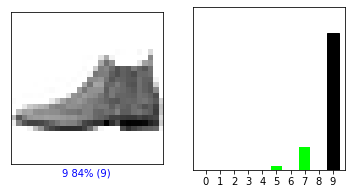

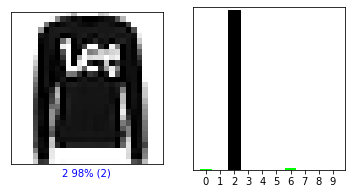

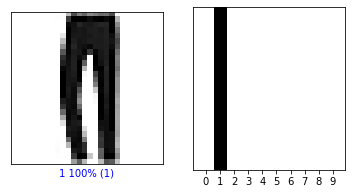

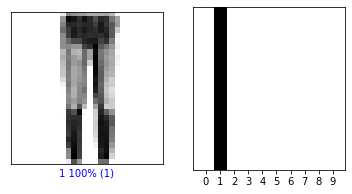

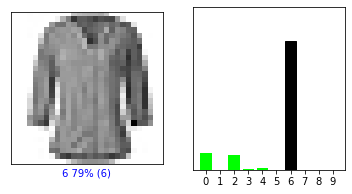

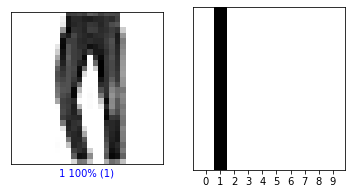

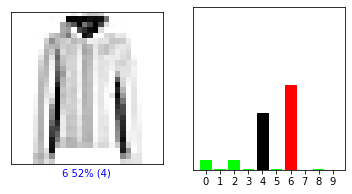

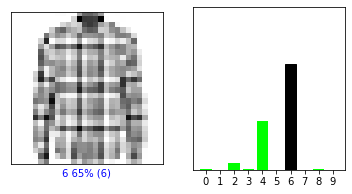

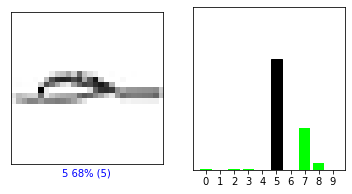

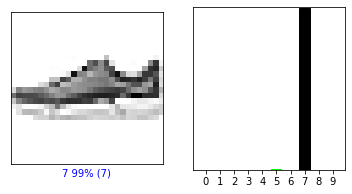

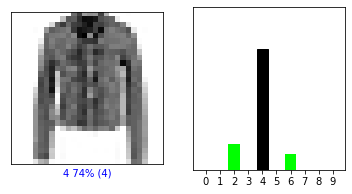

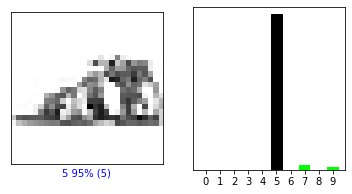

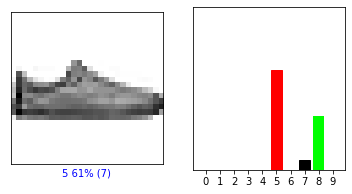

In [ ]:
i = 0
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions[j], test_labels)
  plt.show()

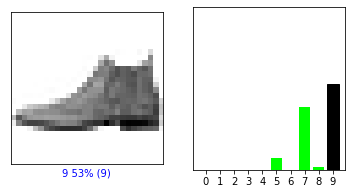

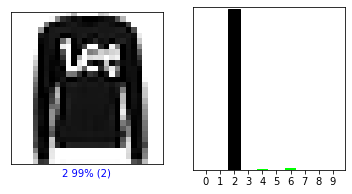

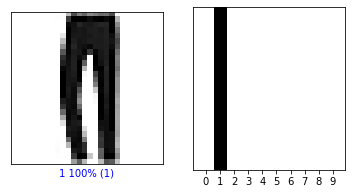

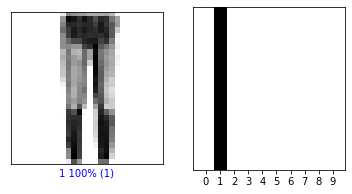

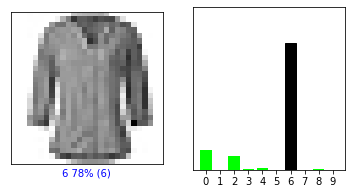

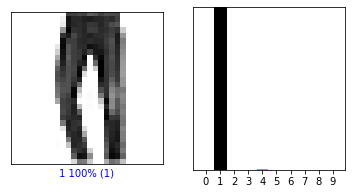

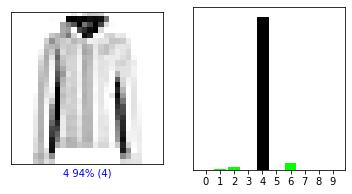

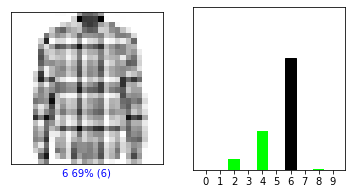

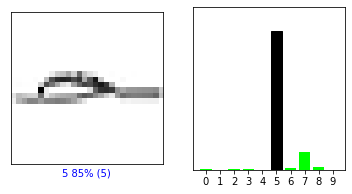

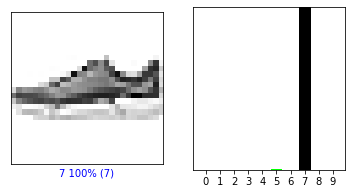

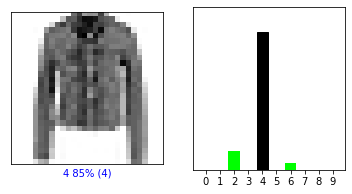

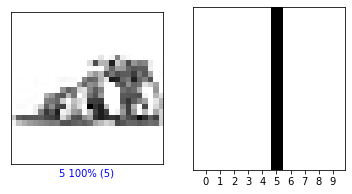

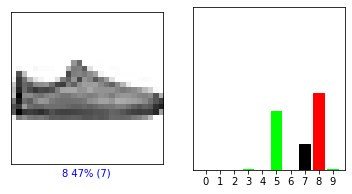

In [ ]:
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions2[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions2[j], test_labels)
  plt.show()

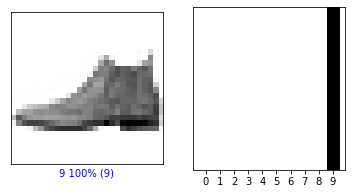

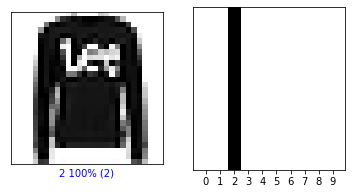

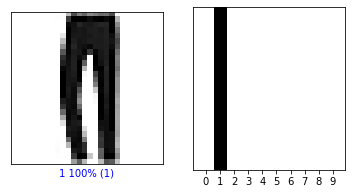

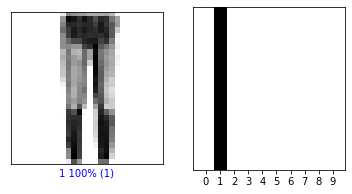

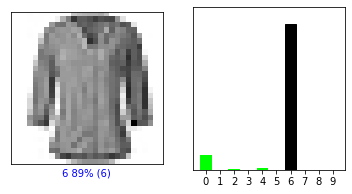

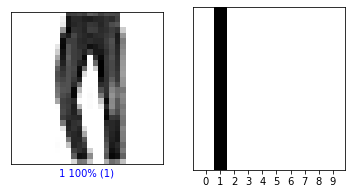

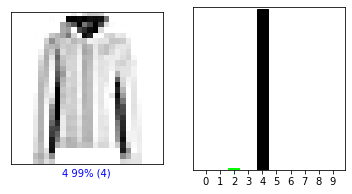

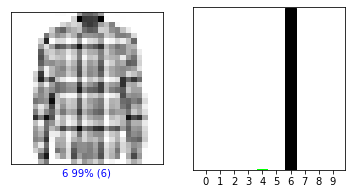

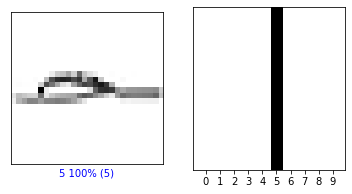

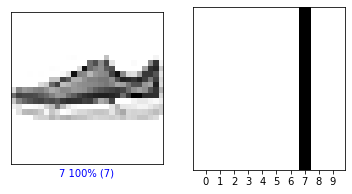

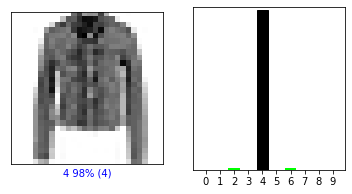

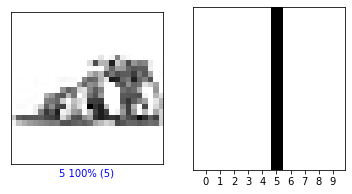

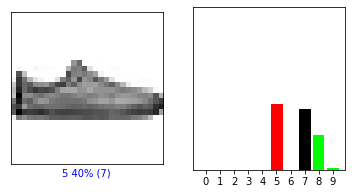

In [ ]:
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions3[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions3[j], test_labels)
  plt.show()

#COCEPTOS DE BATCH_NORMALIZATION Y DROPOUT

**Batch_normalization**

- Concepto 

    El "batch_normalization", como su nombre indica, normaliza los lotes de datos, de manera que la media de salida de cada lote de los datos estará alrededor del cero y desviacióne estándar cerca de 1. La media y la desviación estándar de cada variable se actualizan para cada minilote y se mantiene un promedio en ejecución.
    
    Sin embargo, no actúa igual que cuando lo hacíamos de manera "manual", puesto que normalizabamos los datos de entrenamiento y los de test por separado, para no contaminar los datos de test en función de los de entrenamiento. Sin embargo, esta función utiliza la media y la desviación estándar de los lotes de entrenamiento para normalizar la salida de los datos de test.  

    Esto implica que solo normalizará los datos de test cuando haya utilizado datos de entrenamiento con estadísticas similares.

    Como los datos de test están influidos por los de entrenamiento, la precisión será menor y nuestro modelo no será óptimo. 

- Aplicación al modelo 1

    Veamos que ocurre si empleamos el batch_normalization en el modelo 1:


Antes de crear la red, volvemos a importar los datos porque los anteriores ya están normalizados.

In [ ]:
(train_imagesBN, train_labelsBN), (test_imagesBN, test_labelsBN) = tf.keras.datasets.fashion_mnist.load_data()
assert train_imagesBN.shape == (60000,28,28)
assert test_imagesBN.shape == (10000,28,28)
assert train_labelsBN.shape == (60000,)
assert test_labelsBN.shape == (10000,)

Importamos la librería.

In [ ]:
from keras.layers import BatchNormalization

Creamos la red como anteriormente y añadimos la capa de normalización.

In [ ]:
modelBN = Sequential()
modelBN.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelBN.add(MaxPooling2D((2, 2)))

modelBN.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelBN.add(MaxPooling2D((2, 2)))

modelBN.add(Flatten())
modelBN.add(BatchNormalization())
modelBN.add(Dense(10, activation='softmax'))
modelBN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)            

In [ ]:
modelBN.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
historyBN=modelBN.fit(train_imagesBN, train_labelsBN,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5165 - accuracy: 0.8166 - val_loss: 0.4154 - val_accuracy: 0.8540
Epoch 2/5
960/960 [==============================] - 4s 4ms/step - loss: 0.3730 - accuracy: 0.8687 - val_loss: 0.3968 - val_accuracy: 0.8545
Epoch 3/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3286 - accuracy: 0.8843 - val_loss: 0.3979 - val_accuracy: 0.8582
Epoch 4/5
960/960 [==============================] - 4s 4ms/step - loss: 0.3015 - accuracy: 0.8959 - val_loss: 0.3295 - val_accuracy: 0.8861
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.2822 - accuracy: 0.8996 - val_loss: 0.3772 - val_accuracy: 0.8742


Vemos que la precisión es del 89,61% frente al 85,20% del caso 1, muy similar aunque esta sea un poco más precisa. Podemos asumir con esto que los datos de test son muy similares a los datos de entrenamiento. 

**Dropout**

- Concepto 

    Cada cierto numero de datos introduce uno de ellos con valor 0, siendo su aportación nula y en la cual los pesos no varían tras su paso. De esta manera, el dropout permite que los pesos no se ajusten demasiado, y por lo tanto evitar el sobreajuste que empeore el modelo. 

    El hecho de que neuronas al azar no intervengan durante el entrenamiento impica que otras neuronas deben actuar para las predicciones de las neuronas que el Dropout ha eliminado. Se cree que esto da lugar a que la red aprenda múltiples representaciones internas independientes.
    
    La consecuencia es que la red pierde sensiblidad a los pesos de las neuronas, por lo que la red obtiene una generalización mejor y la probablidad del sobreentrenamiento es menor.

- Aplicación al modelo 1

    Veamos que ocurre si empleamos el dropout en el modelo 1:


A diferencia del bacth_normalization, nos sirven los datos importados al principio de la práctica, por lo que nos ahorramos el volver a importamos. 

Importamos la librería y creamos la red de neuronas:

In [ ]:
from keras.layers import Dropout

 Elegimos una tasa de dropout del 20 %, lo que significa que una de cada cinco entradas se excluirá al azar de cada ciclo de actualización.

In [ ]:
modelD = Sequential()
modelD.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelD.add(MaxPooling2D((2, 2)))
modelD.add(Dropout(0.2))

modelD.add(Flatten())
modelD.add(Dense(10, activation='softmax'))
modelD.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0         
                                                                 
 flatten_8 (Flatten)         (None, 1024)             

In [ ]:
modelD.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
historyD=modelD.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 1.0350 - accuracy: 0.6376 - val_loss: 0.6364 - val_accuracy: 0.7674
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.6291 - accuracy: 0.7690 - val_loss: 0.5526 - val_accuracy: 0.8003
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5562 - accuracy: 0.7961 - val_loss: 0.5132 - val_accuracy: 0.8138
Epoch 4/5
960/960 [==============================] - 3s 4ms/step - loss: 0.5139 - accuracy: 0.8159 - val_loss: 0.4709 - val_accuracy: 0.8322
Epoch 5/5
960/960 [==============================] - 3s 4ms/step - loss: 0.4814 - accuracy: 0.8259 - val_loss: 0.4485 - val_accuracy: 0.8428


Vemos que la precisión es del 85,40% frente al 85,20% del caso 1, muy similar aunque esta sea un 0.2% más precisa.

# CONCEPTO DE CALLBACKS

- Concepto

    Una Callback reúne varias funciones que se aplicarán en determinadas etapas de los datos de entrenamiento. Se emplean para obtener las estadísticas del modelo durante el entrenamiento. 
    Defines y usas las callbacks cuando quieres automatizar algunas tareas después de cada entrenamiento que te ayudan a controlar sobre el proceso de entrenamiento. Un ejemplo sería detener el entrenamiento cuando alcanza una cierta puntuación de precisión o de pérdida o ajustar las tasas de aprendizaje a lo largo del tiempo. Veamos algunos ejemplos: 

    - **EarlyStopping**, que para el entrenamiento si no hay cambios hacia val_loss después de las épocas que se desee y mantiene los mejores pesos una vez que se detiene el entrenamiento.

    - **ModelCheckpoint**, que guarda el modelo después de cada epoch. 

    - **LearningRateScheduler.** Ajusta la tasa de aprendizaje a lo largo del tiempo usando un horario que ya escribes de antemano. Esta función devuelve la tasa de aprendizaje deseada basada en la epoch que se marca de entrada.

    - **BaseLogger.** Callback que acumula las medias de cada época. Esta callback se aplica automáticamente a todos los modelos de Keras.


- Aplicación al modelo 1

    Veamos que ocurre si empleamos estas funciones en el modelo 1:

**EarlyStopping**

Importamos la libreria y creamos la red

In [1]:
from keras.callbacks import EarlyStopping

In [5]:
modelES = Sequential()
modelES.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelES.add(MaxPooling2D((2, 2)))

modelES.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelES.add(MaxPooling2D((2, 2)))

modelES.add(Flatten())
modelES.add(Dense(10, activation='softmax'))
modelES.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [6]:
modelES.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

Definimos que pare cuando no haya después de 3 épocas

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

In [12]:
historyES=modelES.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2, callbacks=[callback])

Epoch 1/25
960/960 [==============================] - 3s 3ms/step - loss: 0.2738 - accuracy: 0.9031 - val_loss: 0.3155 - val_accuracy: 0.8852
Epoch 2/25
960/960 [==============================] - 3s 3ms/step - loss: 0.2703 - accuracy: 0.9044 - val_loss: 0.3128 - val_accuracy: 0.8878
Epoch 3/25
960/960 [==============================] - 3s 3ms/step - loss: 0.2666 - accuracy: 0.9064 - val_loss: 0.3138 - val_accuracy: 0.8886
Epoch 4/25
960/960 [==============================] - 3s 3ms/step - loss: 0.2641 - accuracy: 0.9064 - val_loss: 0.3059 - val_accuracy: 0.8912
Epoch 5/25
960/960 [==============================] - 4s 4ms/step - loss: 0.2608 - accuracy: 0.9079 - val_loss: 0.3190 - val_accuracy: 0.8854
Epoch 6/25
960/960 [==============================] - 4s 4ms/step - loss: 0.2593 - accuracy: 0.9083 - val_loss: 0.3118 - val_accuracy: 0.8907
Epoch 7/25
960/960 [==============================] - 4s 4ms/step - loss: 0.2561 - accuracy: 0.9089 - val_loss: 0.3286 - val_accuracy: 0.8846
Epoch 

Vemos que no se produce un stop en las epochs porque no hay ninguna época donde la pérdida se mantenga constante durante 3 seguidas. 

**ModelCheckpoint**

Importamos la libreria y creamos la red

In [13]:
from keras.callbacks import ModelCheckpoint

In [18]:
modelCP = Sequential()
modelCP.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelCP.add(MaxPooling2D((2, 2)))

modelCP.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelCP.add(MaxPooling2D((2, 2)))

modelCP.add(Flatten())
modelCP.add(Dense(10, activation='softmax'))
modelCP.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [19]:
modelCP.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

Definimos el ckeckpoint:

In [16]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [21]:
historyCP=modelCP.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2, callbacks=[model_checkpoint_callback])

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5342 - accuracy: 0.8077 - val_loss: 0.4974 - val_accuracy: 0.8277
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.4857 - accuracy: 0.8263 - val_loss: 0.4630 - val_accuracy: 0.8372
Epoch 3/5
960/960 [==============================] - 4s 4ms/step - loss: 0.4555 - accuracy: 0.8388 - val_loss: 0.4500 - val_accuracy: 0.8399
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4326 - accuracy: 0.8464 - val_loss: 0.4196 - val_accuracy: 0.8529
Epoch 5/5
960/960 [==============================] - 3s 4ms/step - loss: 0.4147 - accuracy: 0.8528 - val_loss: 0.4174 - val_accuracy: 0.8547


**LearningRateScheduler**

Importamos la libería y realizamos los mismos pasos que con las dos anteriores: 

In [31]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [32]:
modelLR = Sequential()
modelLR.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelLR.add(MaxPooling2D((2, 2)))

modelLR.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelLR.add(MaxPooling2D((2, 2)))

modelLR.add(Flatten())
modelLR.add(Dense(10, activation='softmax'))
modelLR.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [33]:
modelLR.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [34]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [35]:
historyLR=modelLR.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2, callbacks=LearningRateScheduler(step_decay))

Epoch 1/5
960/960 [==============================] - 5s 4ms/step - loss: 0.6043 - accuracy: 0.7806 - val_loss: 0.4351 - val_accuracy: 0.8422 - lr: 0.1000
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3820 - accuracy: 0.8655 - val_loss: 0.3489 - val_accuracy: 0.8743 - lr: 0.1000
Epoch 3/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3316 - accuracy: 0.8815 - val_loss: 0.3178 - val_accuracy: 0.8882 - lr: 0.1000
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.3047 - accuracy: 0.8902 - val_loss: 0.3217 - val_accuracy: 0.8876 - lr: 0.1000
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.2826 - accuracy: 0.8975 - val_loss: 0.3094 - val_accuracy: 0.8891 - lr: 0.1000
